## Importing Important Libraries

In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 100 kB/s 
     |████████████████████████████████| 6.8 MB 16.9 MB/s 
     |████████████████████████████████| 981 kB 40.9 MB/s 
     |████████████████████████████████| 263 kB 39.8 MB/s 
     |████████████████████████████████| 1.9 MB 29.2 MB/s 
     |████████████████████████████████| 1.2 MB 36.0 MB/s 
     |████████████████████████████████| 468 kB 34.3 MB/s 
     |████████████████████████████████| 3.3 MB 31.4 MB/s 
     |████████████████████████████████| 895 kB 38.1 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.3-py3-none-any.whl size=25283131 sha256=3bf2181cf349af2cfe1032be0e8b1363b9db0e15e18a625046819570de7e80db
  Stored in directory: /root/.cache/pip/wheels/3c/ef/e1/7da805d8a5944e8a3ac0553831d832c00b1800b848939849cb
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=e2a2e8ee074dcd5380f55291418e171f47b0cdfec83c985f249842280447c4c1
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff

In [2]:
import numpy as np
import pandas as pd
import ktrain
from ktrain import text
import tensorflow as tf

In [3]:
#Let's  check  version of TensorFlow, so that when later we will reload the model, we can use same version of TensorFlow:

tf.version.VERSION

'2.6.0'

## Reading The Data and preparing our train and test data sets

In [5]:
train = pd.read_csv('/content/train (1).txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
test = pd.read_csv('/content/test (1).txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')

In [6]:
#Let's check few rows of our train dataset
train.head(10)


,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [7]:
# let's check category wise distribution of our train data

train.Sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

In [8]:

X_test = test.Input.tolist()
X_train = train.Input.tolist()
y_test = test.Sentiment.tolist()
y_train = train.Sentiment.tolist()

In [9]:
# Let's check  size of our test and train datasets:
print(len(X_test),len(X_train),len(y_test),len(y_train))

2000 16000 2000 16000


In [10]:
#These are the factors in our datasets
factors = ['sadness','joy','anger', 'fear', 'love','surprise']


In [11]:

#Let's encode categories into numeric values
encoding = { 'sadness': 0,'joy':1,'anger':2,'fear':3,'love':4,'surprise':5}

In [12]:
y_train = [encoding[key] for key in y_train]
y_test = [encoding[key] for key in y_test]

Model Building

In [13]:

#Building the model using transformer
# BERT based uncased model is being used. So,I can choose any other model. 
#let's select maxlen of tokenization as 512 (as it's max for BERT).

Model ='bert-base-uncased'
MAXLEN = 512
trans = text.Transformer(Model, maxlen=MAXLEN, class_names= factors)



Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [14]:
#preprocessing out test and train data sets
test_data = trans.preprocess_test(X_test,y_test)
train_data = trans.preprocess_test(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:429: UserWarning: The method preprocess_train was never called. You can disable this warning by setting preprocess_train_called=True.
  warnings.warn('The method preprocess_train was never called. You can disable this warning by setting preprocess_train_called=True.')


preprocessing test...
language: None
test sequence lengths:
	mean : 19
	95percentile : 41
	99percentile : 51


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

preprocessing test...
language: None
test sequence lengths:
	mean : 19
	95percentile : 41
	99percentile : 52


In [15]:
model = trans.get_classifier()

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:429: UserWarning: The method preprocess_train was never called. You can disable this warning by setting preprocess_train_called=True.
  warnings.warn('The method preprocess_train was never called. You can disable this warning by setting preprocess_train_called=True.')


Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

In [18]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=10)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
1600/1600 [==============================] - 638s 396ms/step - loss: 1.3562 - accuracy: 0.4536
Epoch 2/2
1600/1600 [==============================] - 287s 176ms/step - loss: 6.4700 - accuracy: 0.2776


done.
Visually inspect loss plot and select learning rate associated with falling loss


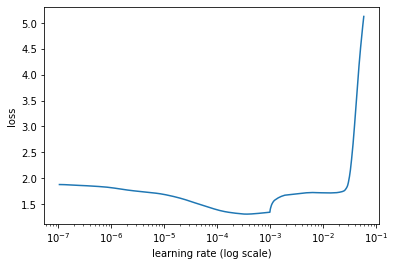

In [19]:
learner.lr_find(show_plot=True, max_epochs=2)

In [29]:
learner.fit_onecycle(3e-2, 2)



begin training using onecycle policy with max lr of 0.03...
Epoch 1/2
1600/1600 [==============================] - 661s 410ms/step - loss: 4.8176 - accuracy: 0.2416 - val_loss: 17.7826 - val_accuracy: 0.3475
Epoch 2/2
1600/1600 [==============================] - 659s 409ms/step - loss: 4.1856 - accuracy: 0.2458 - val_loss: 1.5882 - val_accuracy: 0.3475


Confusion Matrix

In [30]:
learner.validate(val_data=test_data, class_names=factors)

              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00       581
         joy       0.35      1.00      0.52       695
       anger       0.00      0.00      0.00       275
        fear       0.00      0.00      0.00       224
        love       0.00      0.00      0.00       159
    surprise       0.00      0.00      0.00        66

    accuracy                           0.35      2000
   macro avg       0.06      0.17      0.09      2000
weighted avg       0.12      0.35      0.18      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0, 581,   0,   0,   0,   0],
       [  0, 695,   0,   0,   0,   0],
       [  0, 275,   0,   0,   0,   0],
       [  0, 224,   0,   0,   0,   0],
       [  0, 159,   0,   0,   0,   0],
       [  0,  66,   0,   0,   0,   0]])

Checking the top 5 data points which are  not performing good:

In [31]:
learner.view_top_losses(n=5, preproc=trans)

----------
id:65 | loss:3.98 | true:surprise | pred:joy)

----------
id:69 | loss:3.98 | true:surprise | pred:joy)

----------
id:72 | loss:3.98 | true:surprise | pred:joy)

----------
id:152 | loss:3.98 | true:surprise | pred:joy)

----------
id:222 | loss:3.98 | true:surprise | pred:joy)



In [32]:
X_test[152]

'i was so uncomfortable and feeling weird feelings but wasn t sure if they were contractions since i never really felt contractions with jared until they jacked me up with pitocin'

We can see that the above data our model is predicting as joy but label is mentioned as surprise.

Data Prediction

In [33]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [38]:
input = 'I am very happy with this new kind of front camera.'

In [39]:
predictor.predict(input)

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:429: UserWarning: The method preprocess_train was never called. You can disable this warning by setting preprocess_train_called=True.
  warnings.warn('The method preprocess_train was never called. You can disable this warning by setting preprocess_train_called=True.')


'joy'